# Chapter02-文本向量化

## 1. 词向量嵌入

词向量嵌入（word-vector embedding）是近几年发展起来的一项技术，顾名思义，就是将词语转化成向量表示，并嵌入到低维空间中。和我们传统认知上的向量不同，词向量的每个分量不是代表一个指标或一个特征，它们描述的是词语之间的关联。其具体的原理可参考**Tomas Mikolov**在2013年发表的论文。

简单理解，词向量是采用N元语言模型，计算相邻N个词同时出现的概率，并且通过迭代来最大化这个概率，由此得到表示每个词语的向量。学有余力的读者，鼓励通过阅读论文来理解词向量的训练方法和原理。

我们则站在巨人的肩膀上，着重讲解词向量的应用。

### 1.1 使用gensim内建语料进行测试

In [1]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',
                    level=logging.INFO)

D:\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [3]:
common_model = Word2Vec(common_texts,
                        size=100,
                        window=5,
                        min_count=1,
                        workers=4)
common_model.wv['computer']

2019-08-18 11:05:35,831 : INFO : collecting all words and their counts
2019-08-18 11:05:35,834 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-08-18 11:05:35,836 : INFO : collected 12 word types from a corpus of 29 raw words and 9 sentences
2019-08-18 11:05:35,839 : INFO : Loading a fresh vocabulary
2019-08-18 11:05:35,840 : INFO : min_count=1 retains 12 unique words (100% of original 12, drops 0)
2019-08-18 11:05:35,842 : INFO : min_count=1 leaves 29 word corpus (100% of original 29, drops 0)
2019-08-18 11:05:35,845 : INFO : deleting the raw counts dictionary of 12 items
2019-08-18 11:05:35,846 : INFO : sample=0.001 downsamples 12 most-common words
2019-08-18 11:05:35,847 : INFO : downsampling leaves estimated 3 word corpus (12.1% of prior 29)
2019-08-18 11:05:35,859 : INFO : estimated required memory for 12 words and 100 dimensions: 15600 bytes
2019-08-18 11:05:35,861 : INFO : resetting layer weights
2019-08-18 11:05:35,879 : INFO : training model with

array([ 1.6931355e-03,  1.3559854e-03, -4.3036044e-03, -4.3070265e-03,
        3.5257658e-03, -1.9767899e-03, -3.9562876e-03,  2.7745739e-03,
        2.4305689e-03, -2.3692837e-03,  4.9370211e-03, -3.7910126e-03,
        8.2184846e-04,  8.8666391e-04, -1.2480962e-03, -3.9299279e-03,
        1.8682557e-03, -3.7813389e-03, -1.9181527e-03, -3.9675091e-03,
        1.0762977e-03, -4.4016251e-03,  2.7178426e-03, -9.6157752e-04,
        1.5767392e-04,  3.4741533e-03,  3.7770244e-04, -4.7164070e-04,
        1.6088744e-03,  4.6371599e-04, -2.7181834e-03,  1.4294318e-03,
        1.3381392e-03, -3.3509436e-03, -1.6528608e-03, -5.4791057e-04,
       -3.8571504e-03, -4.4036009e-03, -6.3351967e-04, -1.8720198e-04,
        3.1570171e-03,  4.0729053e-04, -2.8264194e-03,  3.2852439e-03,
       -2.9310253e-03,  3.8118286e-03,  3.5128617e-03,  3.1404712e-03,
       -4.8318151e-03,  1.2969869e-03, -3.0686523e-04,  4.6580256e-04,
        9.8408153e-04, -8.4403442e-04,  2.9146604e-03,  6.2719116e-04,
      

    直接调用gensim中的Word2Vec类就可以训练词向量。例子中，我们设置了词向量维度为100；当前单词与预测单词的最远距离为5，也就是说我们最多通过前五个词来预测下面一个单词；单词出现次数下限为1，否则忽略，实际上也就是考虑了所有的单词。

### 1.2 实战应用

    首先还是导入需要的文本：

In [4]:
file_path = "./datasets/three_body_1.txt"

with open(file_path, 'r') as f:
    document = f.readlines()

print(document[:50])

['《三体》\n', '作者：刘慈欣\n', '\n', '正文\n', '\n', '前言\n', '\n', '\u3000\u3000《三体》终于能与科幻朋友们见面了，用连载的方式事先谁都没有想到，也是无奈之举。之前就题材问题与编辑们仔细商讨过，感觉没有什么问题，但没想到今年是文革三十周年这事儿，单行本一时出不了，也只能这样了。\n', '\n', '\u3000\u3000其实这本书不是文革题材的，文革内容在其中只占不到十分之一，但却是一个漂荡在故事中挥之不去的精神幽灵。\n', '\n', '\u3000\u3000本书虽不是《球状闪电》的续集，但可以看做那个故事所发生的世界在其后的延续，那个物理学家在故事中出现但已不重要，其他的人则永远消失了，林云真的死了，虽然我有时在想，如果她活下来，最后是不是这个主人公的样子？\n', '\n', '\u3000\u3000这是一个暂名为《地球往事》的系列的第一部，可以看做一个更长的故事的开始。\n', '\n', '\u3000\u3000这是一个关于背叛的故事，也是一个生存与死亡的故事，有时候，比起生存还是死亡来，忠诚与背叛可能更是一个问题。\n', '\n', '\u3000\u3000疯狂与偏执，最终将在人类文明的内部异化出怎样的力量？冷酷的星空将如何拷问心中道德？\n', '\n', '\u3000\u3000作者试图讲述一部在光年尺度上重新演绎的中国现代史，讲述一个文明二百次毁灭与重生的传奇。\n', '\n', '\u3000\u3000朋友们将会看到，连载的这第一期，几乎不是科幻，但这本书并不是这一期显示出来的这个样子，它不是现实科幻，比《球状闪电》更空灵，希望您能耐心地看下去，后面的故事变化会很大。\n', '\n', '\u3000\u3000在以后的一段时光中，读者朋友们将走过我在过去的一年中走过的精神历程，坦率地说，我不知道你们将在这条黑暗诡异的迷途上看到什么，我很不安。但科幻写到今天，能够与大家同行这么长一段，也是缘份。\n', '\n', '《三体》 作者：刘慈欣\n', '\n', '\n', '1.疯狂年代\n', '\n', '\u3000\u3000中国，1967年。\n', '\n', '\u3000\u3000“红色联合”对“四·二八兵团”总部大楼的攻击已持续了两天，他们的旗帜

    我们实际上读取了整个《三体》第一部，readlines方法将每一行读取为列表中的一个元素，而文本中的每一行实际上也就是原文的一个自然段，最后返回整个列表。

In [17]:
document = list(filter(lambda x: x != '\n', document))
print(document[:50])

['《三体》\n', '作者：刘慈欣\n', '正文\n', '前言\n', '\u3000\u3000《三体》终于能与科幻朋友们见面了，用连载的方式事先谁都没有想到，也是无奈之举。之前就题材问题与编辑们仔细商讨过，感觉没有什么问题，但没想到今年是文革三十周年这事儿，单行本一时出不了，也只能这样了。\n', '\u3000\u3000其实这本书不是文革题材的，文革内容在其中只占不到十分之一，但却是一个漂荡在故事中挥之不去的精神幽灵。\n', '\u3000\u3000本书虽不是《球状闪电》的续集，但可以看做那个故事所发生的世界在其后的延续，那个物理学家在故事中出现但已不重要，其他的人则永远消失了，林云真的死了，虽然我有时在想，如果她活下来，最后是不是这个主人公的样子？\n', '\u3000\u3000这是一个暂名为《地球往事》的系列的第一部，可以看做一个更长的故事的开始。\n', '\u3000\u3000这是一个关于背叛的故事，也是一个生存与死亡的故事，有时候，比起生存还是死亡来，忠诚与背叛可能更是一个问题。\n', '\u3000\u3000疯狂与偏执，最终将在人类文明的内部异化出怎样的力量？冷酷的星空将如何拷问心中道德？\n', '\u3000\u3000作者试图讲述一部在光年尺度上重新演绎的中国现代史，讲述一个文明二百次毁灭与重生的传奇。\n', '\u3000\u3000朋友们将会看到，连载的这第一期，几乎不是科幻，但这本书并不是这一期显示出来的这个样子，它不是现实科幻，比《球状闪电》更空灵，希望您能耐心地看下去，后面的故事变化会很大。\n', '\u3000\u3000在以后的一段时光中，读者朋友们将走过我在过去的一年中走过的精神历程，坦率地说，我不知道你们将在这条黑暗诡异的迷途上看到什么，我很不安。但科幻写到今天，能够与大家同行这么长一段，也是缘份。\n', '《三体》 作者：刘慈欣\n', '1.疯狂年代\n', '\u3000\u3000中国，1967年。\n', '\u3000\u3000“红色联合”对“四·二八兵团”总部大楼的攻击已持续了两天，他们的旗帜在大楼周围躁动地飘扬着，仿佛渴望干柴的火种。\n', '\u3000\u3000“红色联合”的指挥官心急如焚，他并不惧怕大楼的守卫者，那二百多名“四·二八”战士，与诞生于l966年初、经历过大

In [18]:
import jieba
import re

document = [
    jieba.lcut(re.sub("[^\u4e00-\u9fa5]", '', doc)) for doc in document
]
print(document)

[['三体'], ['作者', '刘慈欣'], ['正文'], ['前言'], ['三体', '终于', '能', '与', '科幻', '朋友', '们', '见面', '了', '用', '连载', '的', '方式', '事先', '谁', '都', '没有', '想到', '也', '是', '无奈', '之', '举', '之前', '就', '题材', '问题', '与', '编辑', '们', '仔细', '商讨', '过', '感觉', '没有', '什么', '问题', '但', '没想到', '今年', '是', '文革', '三十周年', '这', '事儿', '单行本', '一时', '出', '不了', '也', '只能', '这样', '了'], ['其实', '这', '本书', '不是', '文革', '题材', '的', '文革', '内容', '在', '其中', '只', '占', '不到', '十分之一', '但', '却是', '一个', '漂荡', '在', '故事', '中', '挥之不去', '的', '精神', '幽灵'], ['本书', '虽', '不是', '球状', '闪电', '的', '续集', '但', '可以', '看做', '那个', '故事', '所', '发生', '的', '世界', '在', '其后', '的', '延续', '那个', '物理学家', '在', '故事', '中', '出现', '但', '已', '不', '重要', '其他', '的', '人', '则', '永远', '消失', '了', '林云', '真的', '死', '了', '虽然', '我', '有时', '在', '想', '如果', '她', '活', '下来', '最后', '是不是', '这个', '主人公', '的', '样子'], ['这是', '一个', '暂', '名为', '地球', '往事', '的', '系列', '的', '第一部', '可以', '看做', '一个', '更长', '的', '故事', '的', '开始'], ['这是', '一个', '关于', '背叛', '的', '故事', '也', '是', '一个', '生存', '与', '死亡', '的', '故事', '

    仍然使用上一节讲过的Counter，统计一下词频看看：

In [19]:
from collections import Counter

wordlist = [word for li in document for word in li]
cntr = Counter(wordlist)
print(cntr)

Counter({'的': 7722, '了': 2390, '在': 1606, '是': 1583, '我': 872, '他': 844, '你': 710, '这': 679, '她': 658, '说': 647, '一个': 635, '中': 633, '和': 614, '都': 595, '汪淼': 591, '上': 571, '也': 524, '就': 521, '但': 517, '着': 514, '有': 501, '不': 449, '那': 428, '对': 420, '没有': 411, '叶文洁': 388, '我们': 387, '到': 382, '人': 379, '三体': 364, '很': 344, '地': 327, '将': 321, '它': 301, '他们': 301, '这个': 287, '什么': 280, '被': 276, '太阳': 275, '自己': 265, '文明': 264, '与': 253, '世界': 251, '看到': 247, '知道': 246, '后': 246, '从': 228, '就是': 223, '又': 219, '像': 216, '现在': 213, '可能': 205, '能': 198, '宇宙': 194, '把': 190, '吗': 190, '地球': 189, '要': 185, '时': 185, '已经': 181, '还': 172, '这样': 170, '可以': 170, '吧': 170, '过': 165, '大': 163, '那个': 160, '信息': 156, '来': 153, '看': 151, '不是': 150, '去': 150, '用': 146, '人类': 142, '让': 141, '向': 138, '想': 137, '会': 133, '你们': 133, '红岸': 133, '这种': 131, '为': 130, '您': 127, '已': 123, '更': 123, '只是': 123, '出现': 120, '科学': 120, '问': 120, '下': 116, '发现': 116, '最': 115, '多': 114, '研究': 114, '开始': 113, 

我们注意到，排名前列的词语有很多诸如“的，了，是……”等等的词，这些词在汉语中是常用的助词，还有一些“你我他”这样的人称代词，这种词在任何表达里基本都是逃不掉的，所以我们认为这种词“没有价值”，在建模时应该去除。这就引出了我们在上一章预处理时没有提到的**停用词（stopwords）**的概念。

为去除停用词，我们一般需要使用停用词典，以百度的停用词为例：

In [24]:
stopwords = open("./datasets/百度停用词表.txt", 'r', encoding="utf-8").readlines()
stopwords = [word[:-1] for word in stopwords]
stopwords

['--',
 '?',
 '“',
 '”',
 '》',
 '－－',
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after',
 'afterwards',
 'again',
 'against',
 "ain't",
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apart',
 'appear',
 'appreciate',
 'appropriate',
 'are',
 "aren't",
 'around',
 'as',
 "a's",
 'aside',
 'ask',
 'asking',
 'associated',
 'at',
 'available',
 'away',
 'awfully',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'best',
 'better',
 'between',
 'beyond',
 'both',
 'brief',
 'but',
 'by',
 'came',
 'can',
 'cannot',
 'cant',
 "can't",
 'cause',
 'causes',
 'certain',
 'certainly',
 'changes',
 'clearly',
 "c'mon",
 'co',
 'com',


In [25]:
wordlist = [word for word in wordlist if word not in stopwords]
print(Counter(wordlist))

Counter({'说': 647, '一个': 635, '中': 633, '都': 595, '汪淼': 591, '上': 571, '不': 449, '叶文洁': 388, '人': 379, '三体': 364, '很': 344, '太阳': 275, '文明': 264, '世界': 251, '后': 246, '宇宙': 194, '地球': 189, '时': 185, '还': 172, '大': 163, '信息': 156, '看': 151, '去': 150, '人类': 142, '想': 137, '会': 133, '红岸': 133, '已': 123, '更': 123, '科学': 120, '问': 120, '下': 116, '发现': 116, '最': 115, '研究': 114, '基地': 113, '使': 112, '两个': 110, '好': 110, '走': 110, '时间': 106, '大史': 103, '一种': 99, '东西': 98, '里': 97, '很快': 97, '发射': 96, '看着': 87, '出': 85, '没': 85, '纪元': 85, '做': 84, '运行': 84, '事': 83, '只': 82, '才': 82, '系统': 81, '前': 80, '技术': 79, '智子': 78, '质子': 77, '感觉': 76, '元首': 76, '回答': 75, '发出': 74, '小': 72, '真的': 71, '站': 71, '杨卫宁': 71, '工作': 70, '背景': 69, '计算机': 68, '文洁': 66, '派': 66, '再': 65, '计划': 65, '父亲': 64, '这是': 63, '游戏': 62, '行星': 61, '仿佛': 60, '声音': 60, '地上': 60, '天线': 60, '仍': 59, '执政官': 59, '孩子': 58, '请': 58, '监听': 58, '三个': 57, '观测': 57, '只能': 56, '听到': 56, '太空': 56, '一名': 55, '发生': 54, '告诉': 54, '外星': 54, '雷

    看，这样是不是好多啦？

In [49]:
model = Word2Vec([wordlist], size=200)

2019-07-28 21:17:54,144 : INFO : collecting all words and their counts
2019-07-28 21:17:54,145 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-07-28 21:17:54,158 : INFO : collected 13303 word types from a corpus of 56884 raw words and 1 sentences
2019-07-28 21:17:54,159 : INFO : Loading a fresh vocabulary
2019-07-28 21:17:54,169 : INFO : min_count=5 retains 2155 unique words (16% of original 13303, drops 11148)
2019-07-28 21:17:54,170 : INFO : min_count=5 leaves 39793 word corpus (69% of original 56884, drops 17091)
2019-07-28 21:17:54,181 : INFO : deleting the raw counts dictionary of 13303 items
2019-07-28 21:17:54,183 : INFO : sample=0.001 downsamples 41 most-common words
2019-07-28 21:17:54,185 : INFO : downsampling leaves estimated 35137 word corpus (88.3% of prior 39793)
2019-07-28 21:17:54,194 : INFO : estimated required memory for 2155 words and 200 dimensions: 4525500 bytes
2019-07-28 21:17:54,196 : INFO : resetting layer weights
2019-07-28 21:1

    有了向量表示之后，我们可以尝试把结果可视化看看：

In [56]:
from sklearn.manifold.t_sne import TSNE

import numpy as np
import seaborn as sns

word_vectors = np.array(
    [model.wv[word] for word in wordlist if word in model.wv.vocab])
embedded = TSNE(n_components=2,
                verbose=logging.INFO).fit_transform(word_vectors)
print(embedded)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 39793 samples in 0.882s...
[t-SNE] Computed neighbors for 39793 samples in 480.857s...
[t-SNE] Computed conditional probabilities for sample 1000 / 39793
[t-SNE] Computed conditional probabilities for sample 2000 / 39793
[t-SNE] Computed conditional probabilities for sample 3000 / 39793
[t-SNE] Computed conditional probabilities for sample 4000 / 39793
[t-SNE] Computed conditional probabilities for sample 5000 / 39793
[t-SNE] Computed conditional probabilities for sample 6000 / 39793
[t-SNE] Computed conditional probabilities for sample 7000 / 39793
[t-SNE] Computed conditional probabilities for sample 8000 / 39793
[t-SNE] Computed conditional probabilities for sample 9000 / 39793
[t-SNE] Computed conditional probabilities for sample 10000 / 39793
[t-SNE] Computed conditional probabilities for sample 11000 / 39793
[t-SNE] Computed conditional probabilities for sample 12000 / 39793
[t-SNE] Computed conditional probabilities for s

    这里使用到了t-sne降维方法，其原理我们不再赘述，大家可以自行参考scikit-learn的官方文档及相关论文。值得一提的是，这个算法非常耗时，如果你在自己的机器上运行，可以稍微离开一会儿，放松一下眼睛，做做运动。
    
    得到了词向量在二维平面上的嵌入表示之后，我们可以试着画一下散点图：

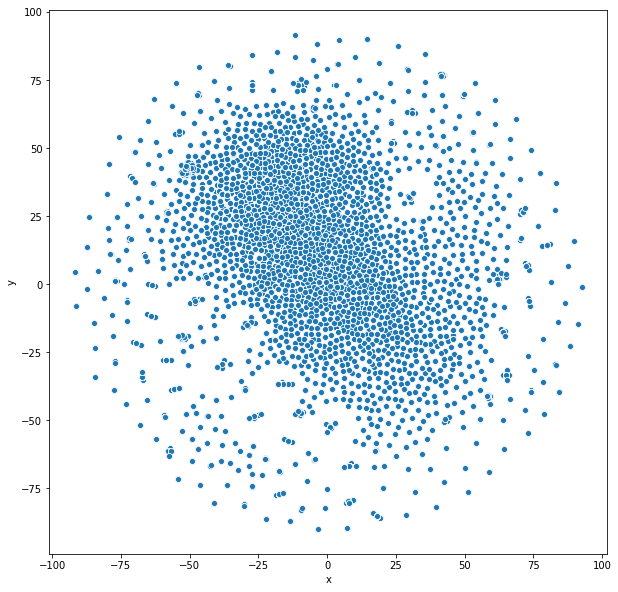

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 10)

df = pd.DataFrame(embedded)
df.columns = ['x', 'y']
df['word'] = pd.Series([word for word in wordlist if word in model.wv.vocab])

sns.scatterplot(x='x', y='y', data=df)

    在这样的可视化结果中，语义相似或相近的词语会聚成一类。
    
    当然，词向量能做的事情还远远不止这些，更不是只有画个图可视化一下的价值而已，我们在之后将会讨论更高级、更复杂的应用。

## 2. 文本特征向量

在许多机器学习任务中，构建数据集的特征是至关重要的一个环节，甚至有专门的一套理论叫做“特征工程”来研究如何提取数据特征。我们这一部分来讨论如何从文本数据中建立特征向量，在阅读下面的部分之前，请确保你安装好了scikit-learn库。

In [61]:
corpus = [' '.join(each) for each in document]
print(corpus)

['三体', '作者 刘慈欣', '正文', '前言', '三体 终于 能 与 科幻 朋友 们 见面 了 用 连载 的 方式 事先 谁 都 没有 想到 也 是 无奈 之 举 之前 就 题材 问题 与 编辑 们 仔细 商讨 过 感觉 没有 什么 问题 但 没想到 今年 是 文革 三十周年 这 事儿 单行本 一时 出 不了 也 只能 这样 了', '其实 这 本书 不是 文革 题材 的 文革 内容 在 其中 只 占 不到 十分之一 但 却是 一个 漂荡 在 故事 中 挥之不去 的 精神 幽灵', '本书 虽 不是 球状 闪电 的 续集 但 可以 看做 那个 故事 所 发生 的 世界 在 其后 的 延续 那个 物理学家 在 故事 中 出现 但 已 不 重要 其他 的 人 则 永远 消失 了 林云 真的 死 了 虽然 我 有时 在 想 如果 她 活 下来 最后 是不是 这个 主人公 的 样子', '这是 一个 暂 名为 地球 往事 的 系列 的 第一部 可以 看做 一个 更长 的 故事 的 开始', '这是 一个 关于 背叛 的 故事 也 是 一个 生存 与 死亡 的 故事 有时候 比起 生存 还是 死亡 来 忠诚 与 背叛 可能 更是 一个 问题', '疯狂 与 偏执 最终 将 在 人类文明 的 内部 异化 出 怎样 的 力量 冷酷 的 星空 将 如何 拷问 心中 道德', '作者 试图 讲述 一部 在 光年 尺度 上 重新 演绎 的 中国 现代史 讲述 一个 文明 二百次 毁灭 与 重生 的 传奇', '朋友 们 将 会 看到 连载 的 这 第一期 几乎 不是 科幻 但 这 本书 并 不是 这 一期 显示 出来 的 这个 样子 它 不是 现实 科幻 比 球状 闪电 更 空灵 希望 您 能 耐心 地看 下去 后面 的 故事 变化 会 很大', '在 以后 的 一段 时光 中 读者 朋友 们 将 走过 我 在 过去 的 一年 中 走过 的 精神 历程 坦率地 说 我 不 知道 你们 将 在 这条 黑暗 诡异 的 迷途 上 看到 什么 我 很 不安 但 科幻 写 到 今天 能够 与 大家 同行 这么 长 一段 也 是 缘份', '三体 作者 刘慈欣', '疯狂 年代', '中国 年', '红色 联合 对 四 二八 兵团 总部 大楼 的 攻击 已 持续 了 两天 他们 的 旗帜

In [62]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X = count_vect.fit_transform(corpus)

    我们首先通过一步预处理，得到了类似英文句子的语料，然后把它喂给CountVectorizer。在讲解它的原理之前，让我们先来看看它制造出了什么好东西：

In [67]:
features = count_vect.get_feature_names()
print(len(features), features[:50])

12877 ['一一', '一万个', '一万五千个', '一万步', '一下', '一下四周', '一下头', '一下子', '一下子把', '一下手', '一丝', '一两个', '一个', '一个个', '一个团', '一个多', '一个多月', '一个月', '一个点', '一个班', '一串', '一举', '一举一动', '一九六', '一九六七年', '一书中', '一二一', '一些', '一人', '一亿次', '一代', '一件', '一份', '一会儿', '一位', '一体', '一体化', '一侧', '一倍', '一具', '一刀', '一分钟', '一分钱', '一切', '一切正常', '一切都在', '一切都是', '一到', '一剑', '一副']


    可以看到，CountVectorizer在建模过程中，把每个句子中的词语当作了特征。我们调用fit_transform方法，将这些特征提取出来，并且依据特征将语料转化为了向量表示，它长这个样子：

In [68]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

有的同学可能会问，这什么玩意儿，咋全是0呢？

事实上，这个叫做**文档-术语矩阵（document-term matrix）**，也有的地方翻译成文档-词频矩阵。矩阵的每一行代表一个文档，每一列代表一个术语（term），其实也就是刚才我们提取出的特征。由于每个文档所含的词语一般差别很大，所以dtm矩阵是一个**高度稀疏**的矩阵。

在这里，我们使用的是CountVectorizer，那么矩阵的每个元素都是词频。事实上，还有一种经典的表示方法，叫做tf-idf得分，我们来看一下：

In [74]:
from sklearn.feature_extraction.text import TfidfTransformer

X_tfidf = TfidfTransformer(use_idf=True).fit_transform(X)
X_tfidf.shape

(2668, 12877)

tf，idf分别是**词频（term frequency）和逆向文档频率（inverse document frequency）**的缩写，让我们来看一下他们的定义： 

$$tf = \frac{某个词的出现次数}{文档总词数}$$ 
$$idf = log\frac{语料库文档总数}{含有该词文档数+1}$$
$$tfidf = tf * idf$$

    tf很好理解，不再赘述。而idf表示的是含有该词语的文档比例的多少，含有该词文档数越多，idf得分越低。换句话说，含有该词文档数越多，这个词对于文档的区分能力越差。tfidf则将两个指标综合考量，tfidf得分越高的词汇，其重要程度越高。

## 3. 本章总结

本章主要讨论了将文本向量化表示的两种方法，词向量和特征向量，并且做了简单的实现。实际上，它们在文本分析过程中具有相当重要的作用。在接下来的一章，我们会用一个实战案例，来具体展现它们是怎么样发挥作用的。

参考链接：

[https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html]

[https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf]